**import libraries**

In [17]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
from IPython.display import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the data**


In [20]:
sales = pd.read_csv("sales_train_validation.csv")
prices = pd.read_csv("sell_prices.csv")
cal = pd.read_csv("calendar.csv")

In [ ]:
sales.head()

id        item_id  ... d_1912 d_1913
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  ...      1      1
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  ...      0      0
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  ...      1      1
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  ...      7      2
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  ...      2      4

[5 rows x 1919 columns]

In [ ]:
prices.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [ ]:
cal.head()

date  wm_yr_wk    weekday  ...  snap_CA  snap_TX  snap_WI
0  2011-01-29     11101   Saturday  ...        0        0        0
1  2011-01-30     11101     Sunday  ...        0        0        0
2  2011-01-31     11101     Monday  ...        0        0        0
3  2011-02-01     11101    Tuesday  ...        1        1        0
4  2011-02-02     11101  Wednesday  ...        1        0        1

[5 rows x 14 columns]

In [ ]:
print("The shape of sales data:",sales.shape)
print("The shape of sell_prices data:",prices.shape)
print("The shape of calender data:",cal.shape)

The shape of sales data: (30490, 1919)
The shape of sell_prices data: (6841121, 4)
The shape of calender data: (1969, 14)


**Downcasting**          
(Downcasting reduce the amount of storage used by the datframes)

In [ ]:
sales_b_d=sales.memory_usage().sum()
sales_b_d=np.round(sales_b_d/(1024*1024),1)

cal_b_d=cal.memory_usage().sum()
cal_b_d=np.round(cal_b_d/(1024*1024),1)

prices_b_d=prices.memory_usage().sum()
prices_b_d=np.round(prices_b_d/(1024*1024),1)


In [ ]:
#https://www.kaggle.com/anshuls235/time-series-forecasting-eda-fe-modelling/notebook#2.-Downcasting

def downcast(df):

    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()

    for i,t in enumerate(types):

        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)

        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)

        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')

    return df  

In [ ]:
sales = downcast(sales)
cal = downcast(cal)
prices = downcast(prices)

In [ ]:
sales_a_d=sales.memory_usage().sum()
sales_a_d=np.round(sales_a_d/(1024*1024),1)

cal_a_d=cal.memory_usage().sum()
cal_a_d=np.round(cal_a_d/(1024*1024),1)

prices_a_d=prices.memory_usage().sum()
prices_a_d=np.round(prices_a_d/(1024*1024),1)

In [ ]:
data = {'df':['sales','calendar','prices'],
       'Before downcasting':[sales_b_d,cal_b_d,prices_b_d],
       'After downcasting':[sales_a_d,cal_a_d,prices_a_d]}

df = pd.DataFrame(dic)
memory_decrease=(df["Before downcasting"]-df["After downcasting"])/df["Before downcasting"]
memory_decrease=memory_decrease*100

df["memory_decrease"] = memory_decrease
df

DataFrame  Before downcasting  After downcasting  memory_decrease
0     sales               446.4               95.4        78.629032
1  calendar                 0.2                0.1        50.000000
2    prices               208.8               45.8        78.065134

**Observations**

1. The size of all dataframes approximately reduced to one-fourth of the size of original dataframes.
2.  It reduced the chances of 'RAM crashed' error.

**Basic information of data**

In [ ]:
print('States:',len(sales['state_id'].unique()))
print('Stores:',len(sales['store_id'].unique()))
print('Categories:',len(sales['cat_id'].unique()))
print('Deptartments:',len(sales['dept_id'].unique()))
print('Items:',len(sales['item_id'].unique()))

States: 3
Stores: 10
Categories: 3
Deptartments: 7
Items: 3049


In [ ]:
gp = sales.groupby(['state_id','store_id','cat_id','dept_id'],as_index=False)
gp = gp['item_id'].count().dropna()
gp['USA'] = 'USA'

fig = px.treemap(gp, path=['USA', 'state_id', 'store_id', 'cat_id', 'dept_id'], values='item_id',
                  color='item_id',
                  color_continuous_scale = 'RdBu',
                  title='Walmart: Distribution of items')
            
fig.update_layout(treemapcolorway = ["pink", "lightgray"])
fig.show()

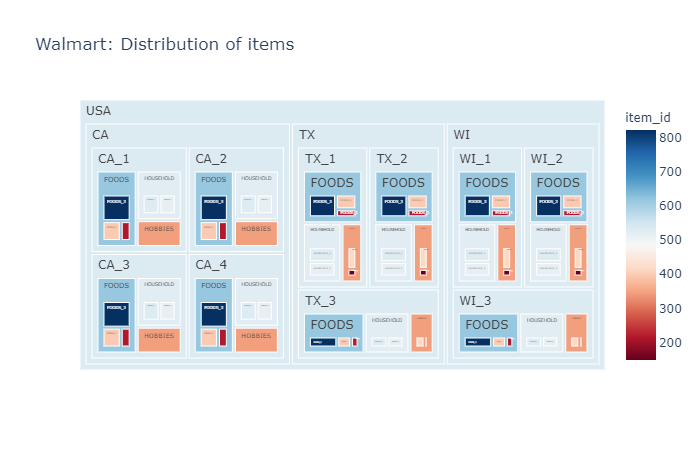

In [2]:
Image(filename='newplot.png') 

**Observations**

1. In the data there are 3 states, 10 stores, 3 categories, 7 departments and 3049 items.
2. a. States are CA, TX and WI.  
   b. Stores are CA_1, CA_2, CA_3, CA_4(CA), TX_1,TX_2, TX_3(TX) and W1_1, WI_2, WI_3(WI).  
   c. Categories are FOODS, HOUSEHOLD and HOBBIES.  
   d. Departments are FOODS_1, FOODS_2, FOODS_3(FOODS), HOUSEHOLD_1, HOUSEHOLD_2(HOUSEHOLD) AND HOBBIES_1, HOBBIES_2(HOBBIES).  

#**Sales_data**

In [ ]:
sales_d = sales.drop(['state_id','store_id','cat_id','dept_id','item_id'], axis=1)
sales_p = sales_d.set_index('id').T.merge(cal.set_index('d')['date'],
                                                 left_index=True,
                                                 right_index=True,
                                                  validate='1:1') 
sales_p = sales_p.set_index('date')

stores = sorted(set(prices['store_id']))
Means=[]
for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)
 
  Means.append(np.mean(sales_p[store_items].sum(axis=1)))

In [ ]:
data = np.transpose([Means, stores])
df = pd.DataFrame(data, columns=["Mean sales", "Stores"])
px.bar(df, x="Stores", y="Mean sales", color="Stores", title="Stores vs Mean sales")

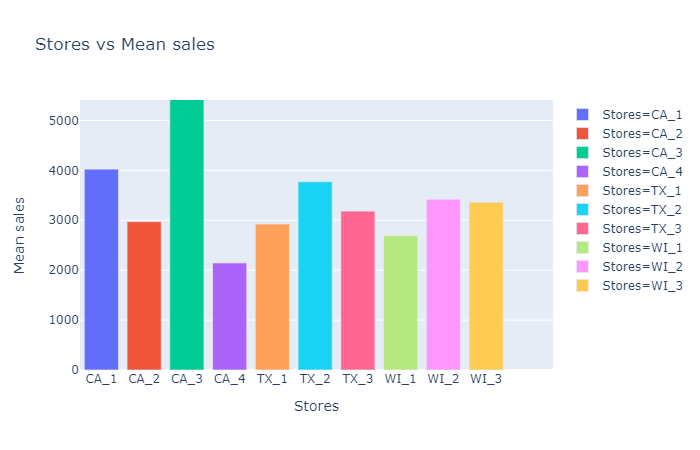

In [3]:
Image(filename='newplot.png') 

**Observations**

1. CA stores have highest mean sales among all the stores and CA_3 has the highest sell among all the stores.
2. CA stores have also highest variance in mean sales among all the stores.

In [ ]:
name=["Rolling Average Sales vs. Time (per store) with window size:7",
      "Rolling Average Sales vs. Time (per store) with window size:10",
      "Rolling Average Sales vs. Time (per store) with window size:13",
      "Rolling Average Sales vs. Time (per store) with window size:30",
      "Rolling Average Sales vs. Time (per store) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).mean()
  l=np.arange(len(data))
  fig.add_trace(go.Scatter(x=l, y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)
 fig.show()

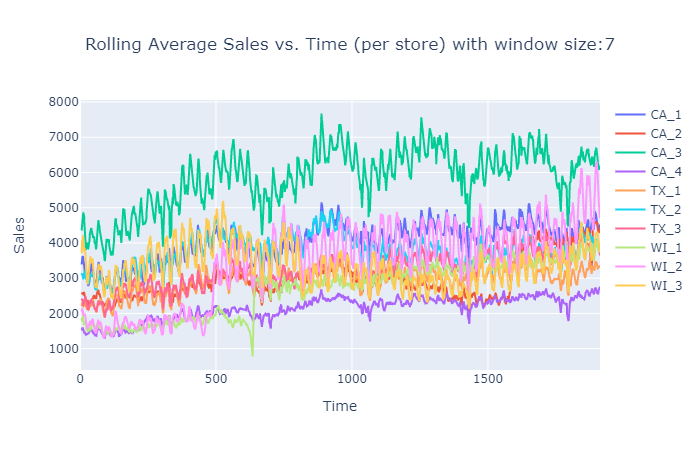

In [3]:
Image(filename='newplot.png') 

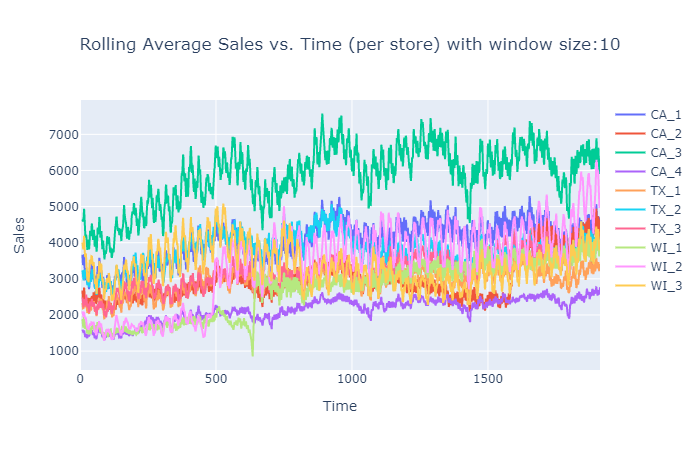

In [4]:
Image(filename='newplot1.png') 

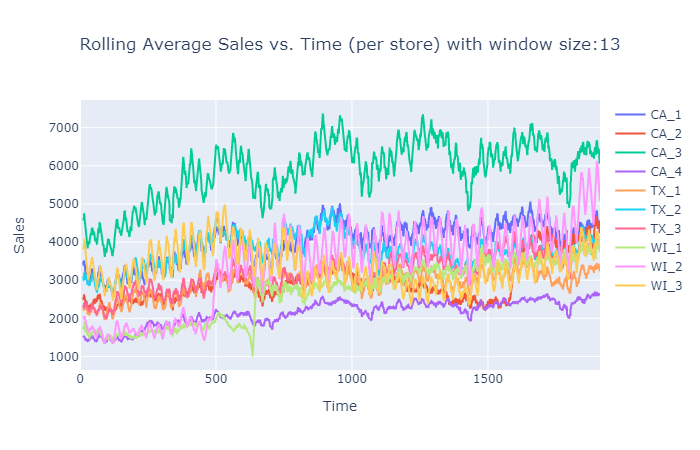

In [5]:
Image(filename='newplot2.png') 

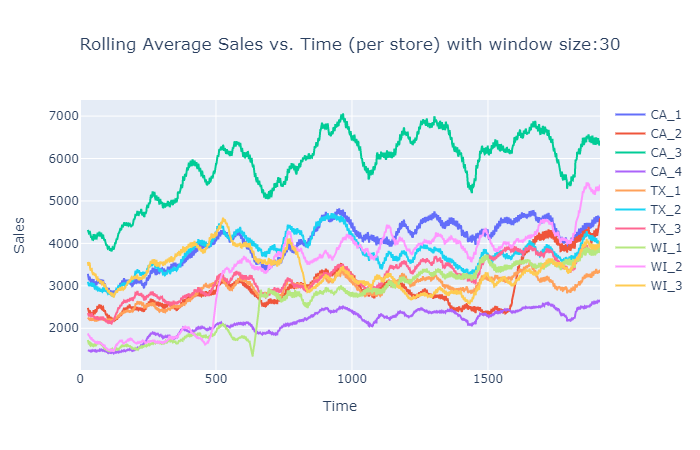

In [6]:
Image(filename='newplot3.png') 

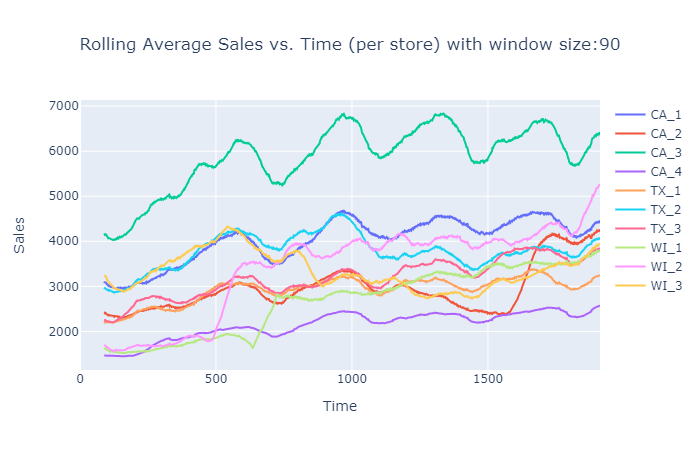

In [7]:
Image(filename='newplot4.png') 

In [ ]:
name=["Rolling Average Sales vs. Time(Box_plot_visualization) with window size:7",
      "Rolling Average Sales vs. Time(Box_plot_visualization) with window size:10",
      "Rolling Average Sales vs. Time(Box_plot_visualization) with window size:13",
      "Rolling Average Sales vs. Time(Box_plot_visualization) with window size:30",
      "Rolling Average Sales vs. Time(Box_plot_visualization) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).mean()
  fig.add_trace(go.Box(x=[store]*len(data), y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)

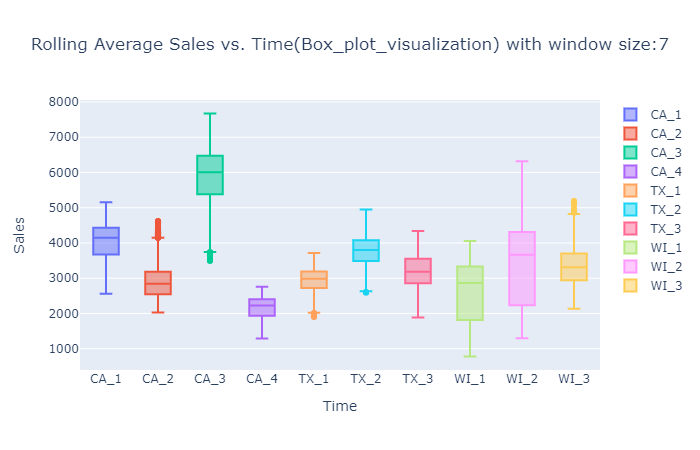

In [8]:
Image(filename='newplot5.png') 

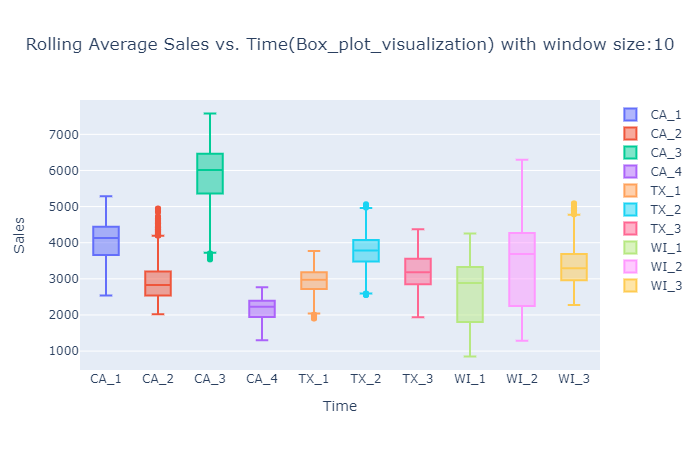

In [9]:
Image(filename='newplot6.png') 

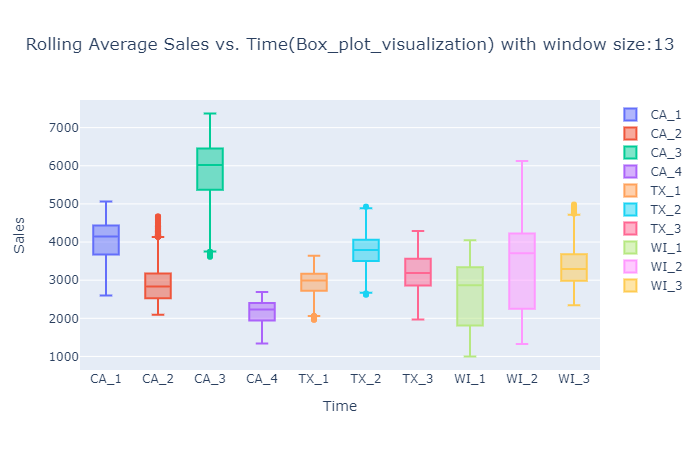

In [10]:
Image(filename='newplot7.png') 

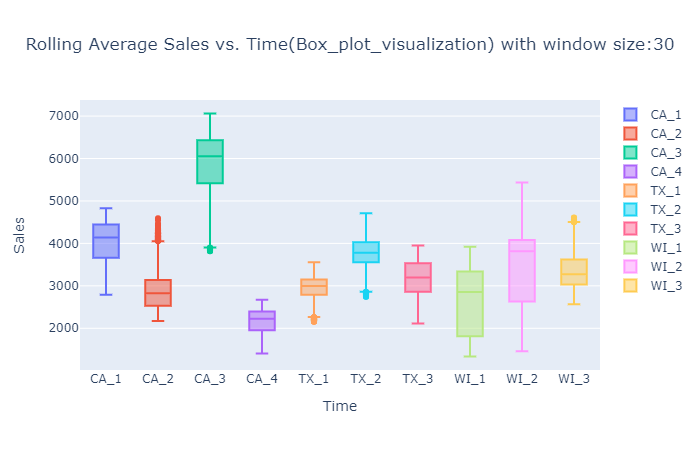

In [11]:
Image(filename='newplot8.png') 

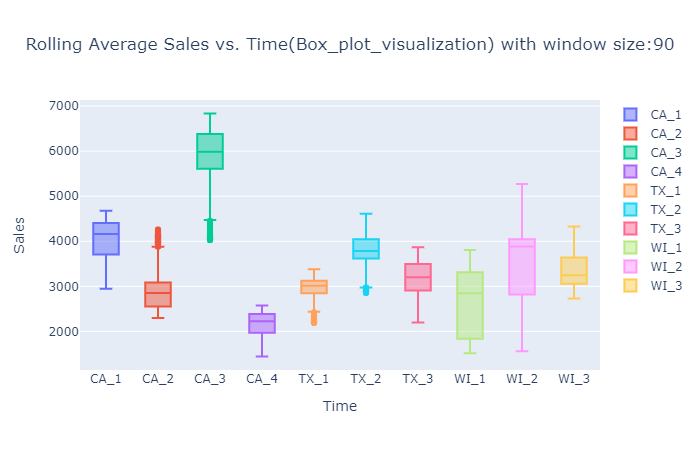

In [12]:
Image(filename='newplot9.png') 

**Observations**

1. Every rolling mean sales curve has 'linear osciallation' trend and also have upward linear trend.
2. CA_3 has the highest sell.
3. CA stores has highest variance in mean sales which may implies that CA has development disparity ie. some places are growing faster than others.
4. WI and TX do not have much varaince which may implies that development is uniform in these states.

# Rolling Medians

In [ ]:
name=["Rolling Medians Sales vs. Time (per store) with window size:7",
      "Rolling Medians Sales vs. Time (per store) with window size:10",
      "Rolling Medians Sales vs. Time (per store) with window size:13",
      "Rolling Medians Sales vs. Time (per store) with window size:30",
      "Rolling Medians Sales vs. Time (per store) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).median()
  l=np.arange(len(data))
  fig.add_trace(go.Scatter(x=l, y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)
 fig.show()

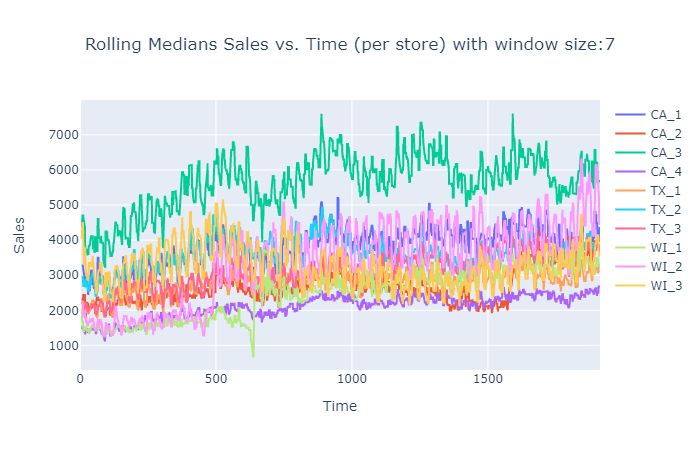

In [13]:
Image(filename='newplot.png') 

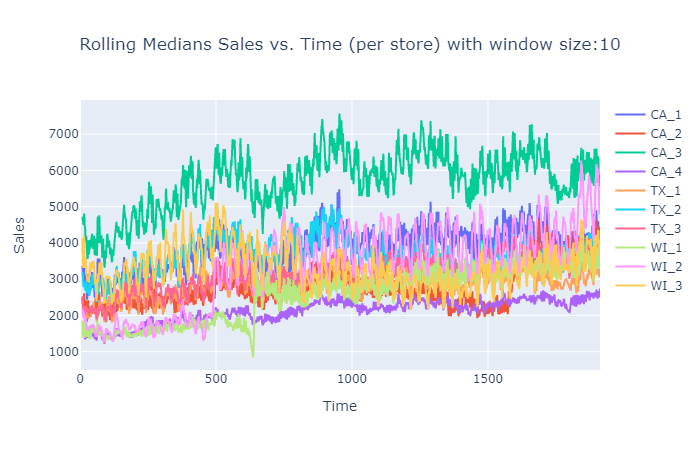

In [14]:
Image(filename='newplot1.png') 

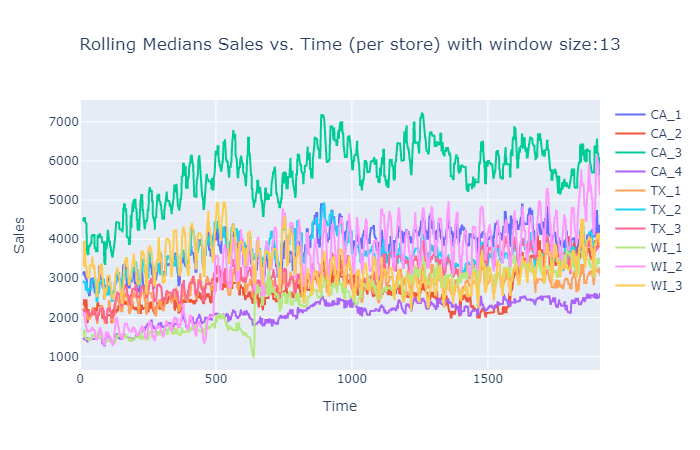

In [15]:
Image(filename='newplot2.png') 

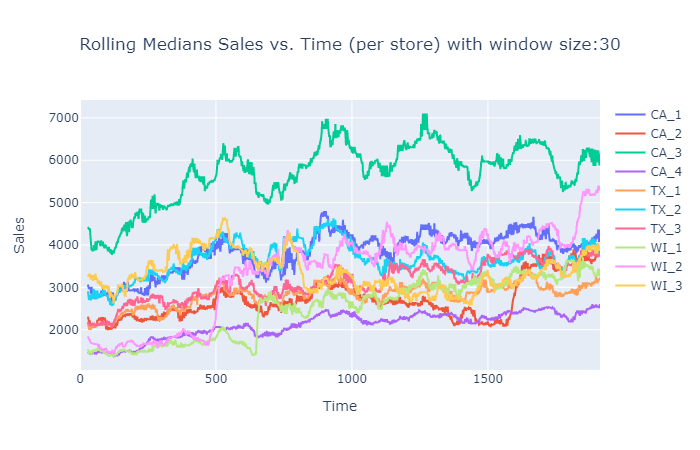

In [16]:
Image(filename='newplot3.png') 

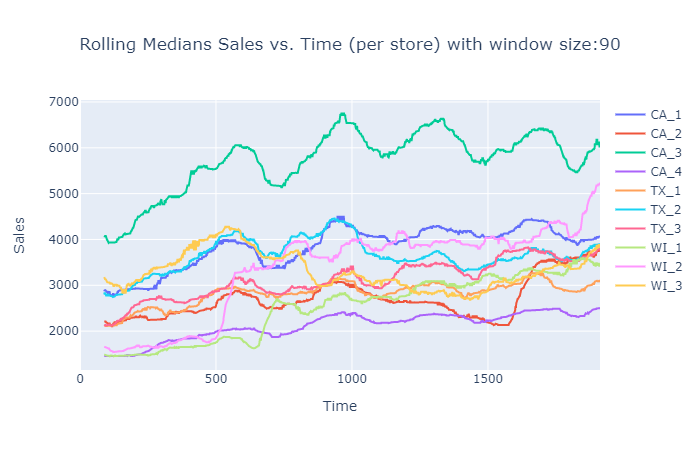

In [17]:
Image(filename='newplot4.png') 

In [ ]:
name=["Rolling Medians Sales vs. Time(Box_plot_visualization) with window size:7",
      "Rolling Medians Sales vs. Time(Box_plot_visualization) with window size:10",
      "Rolling Medians Sales vs. Time(Box_plot_visualization) with window size:13",
      "Rolling Medians Sales vs. Time(Box_plot_visualization) with window size:30",
      "Rolling Medians Sales vs. Time(Box_plot_visualization) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).median()
  fig.add_trace(go.Box(x=[store]*len(data), y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)
 fig.show()

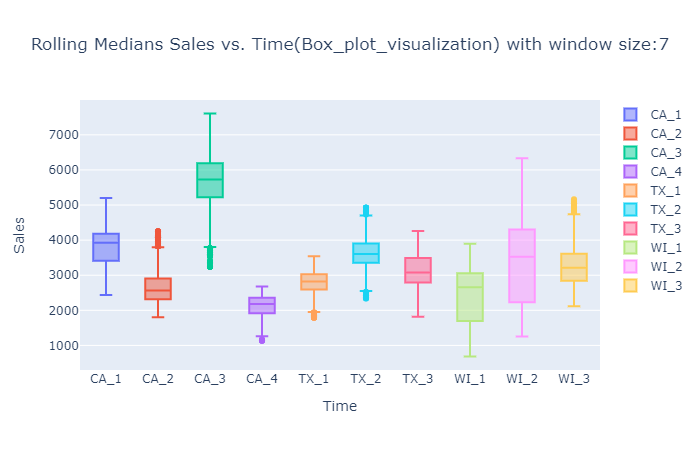

In [18]:
Image(filename='newplot5.png') 

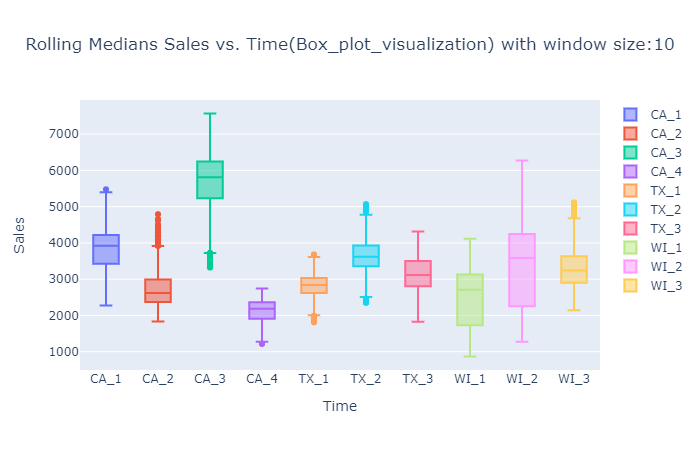

In [19]:
Image(filename='newplot6.png') 

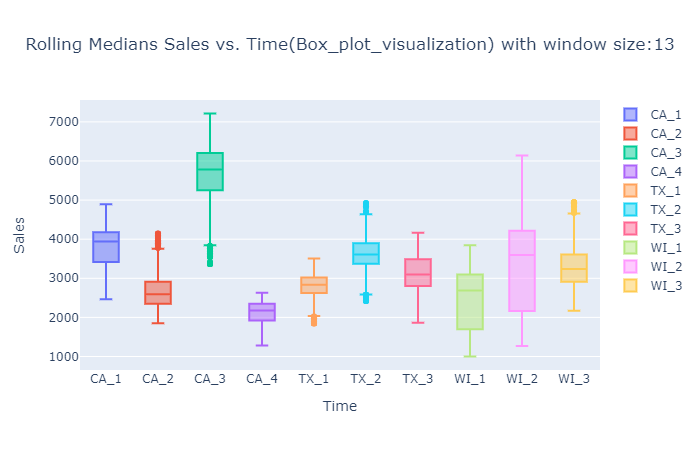

In [20]:
Image(filename='newplot7.png') 

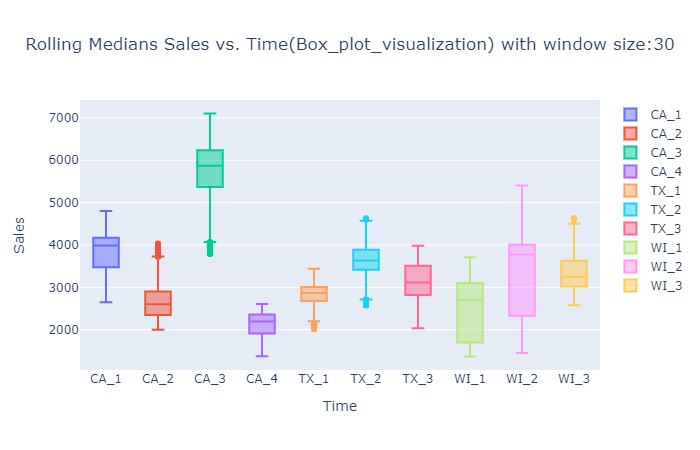

In [21]:
Image(filename='newplot8.png') 

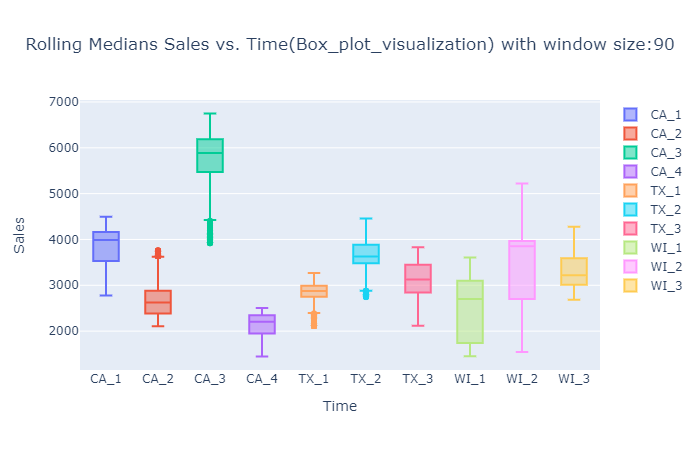

In [22]:
Image(filename='newplot9.png') 

# Observations

Took rolling medians for different window size ie. 7,10,13,30 and 90.     
The observations are quite similar to rolling averages.

# Rolling Minimums

In [ ]:
name=["Rolling Minimums Sales vs. Time (per store) with window size:7",
      "Rolling Minimums Sales vs. Time (per store) with window size:10",
      "Rolling Minimums Sales vs. Time (per store) with window size:13",
      "Rolling Minimums Sales vs. Time (per store) with window size:30",
      "Rolling Minimums Sales vs. Time (per store) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).min()
  l=np.arange(len(data))
  fig.add_trace(go.Scatter(x=l, y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)
 fig.show()

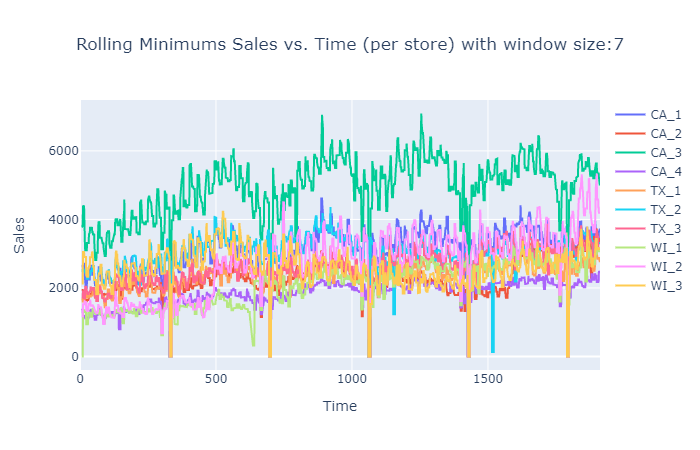

In [29]:
Image(filename='newplot5.png') 

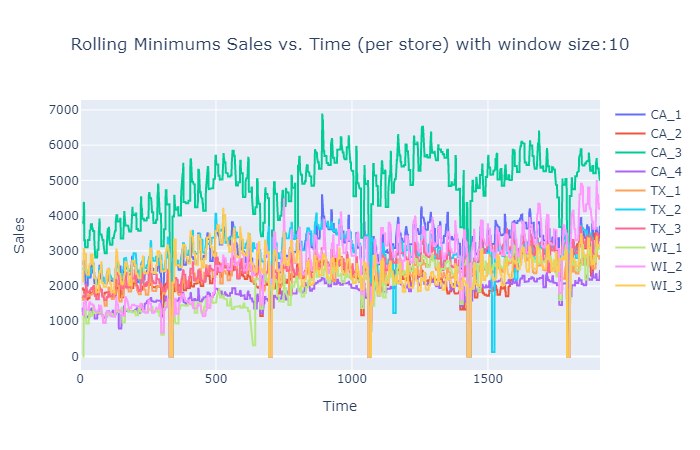

In [30]:
Image(filename='newplot6.png') 

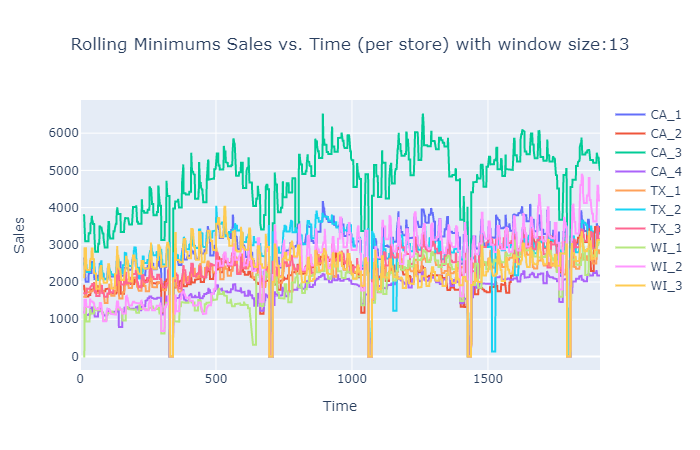

In [31]:
Image(filename='newplot7.png') 

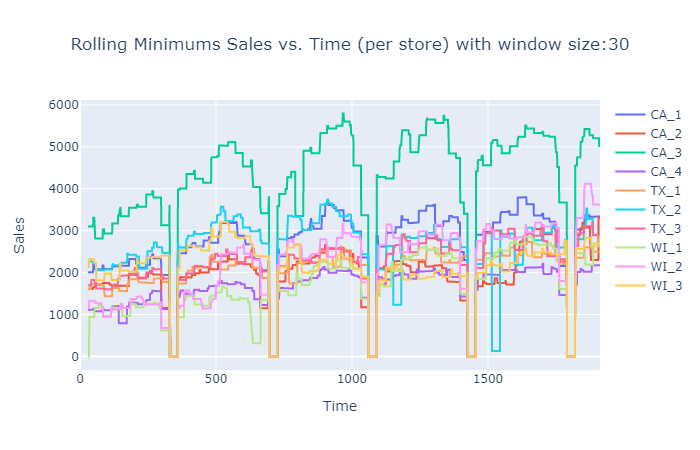

In [32]:
Image(filename='newplot8.png') 

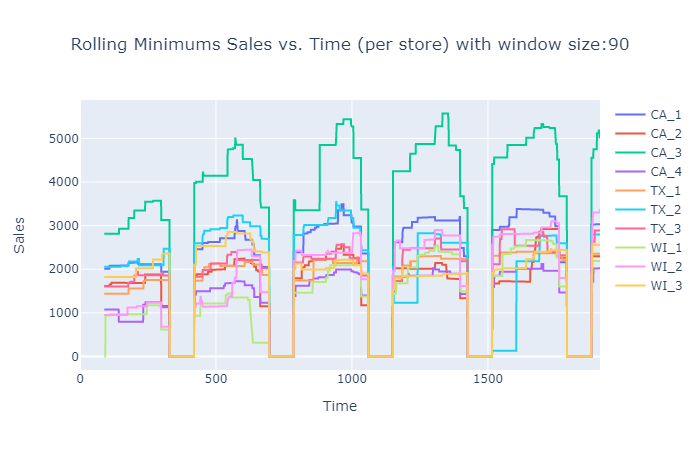

In [33]:
Image(filename='newplot9.png') 

In [ ]:
name=["Rolling Minimums Sales vs. Time(Box_plot_visualization) with window size:7",
      "Rolling Minimums Sales vs. Time(Box_plot_visualization) with window size:10",
      "Rolling Minimums Sales vs. Time(Box_plot_visualization) with window size:13",
      "Rolling Minimums Sales vs. Time(Box_plot_visualization) with window size:30",
      "Rolling Minimums Sales vs. Time(Box_plot_visualization) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).median()
  fig.add_trace(go.Box(x=[store]*len(data), y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)
 fig.show()

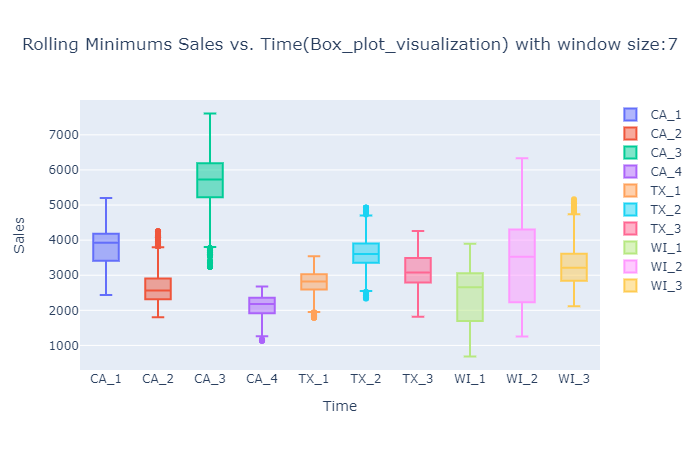

In [28]:
Image(filename='newplot.png') 

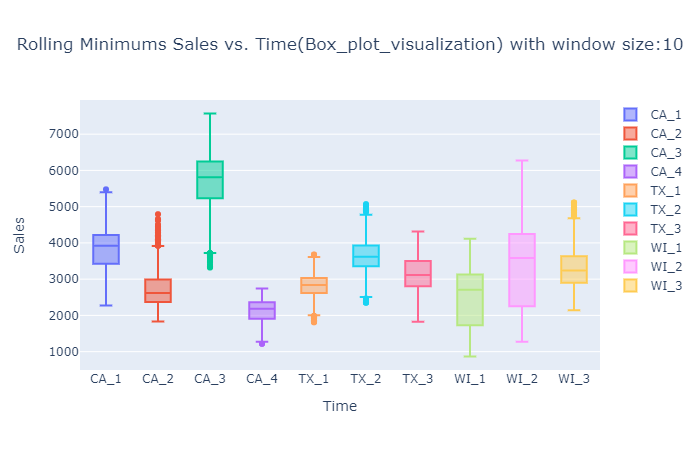

In [24]:
Image(filename='newplot1.png') 

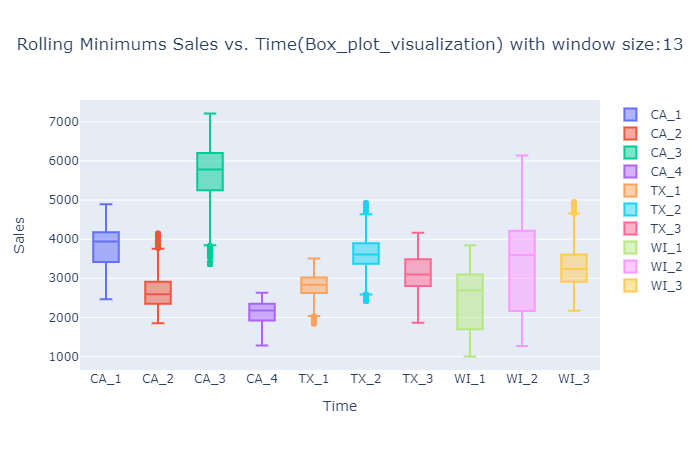

In [25]:
Image(filename='newplot2.png') 

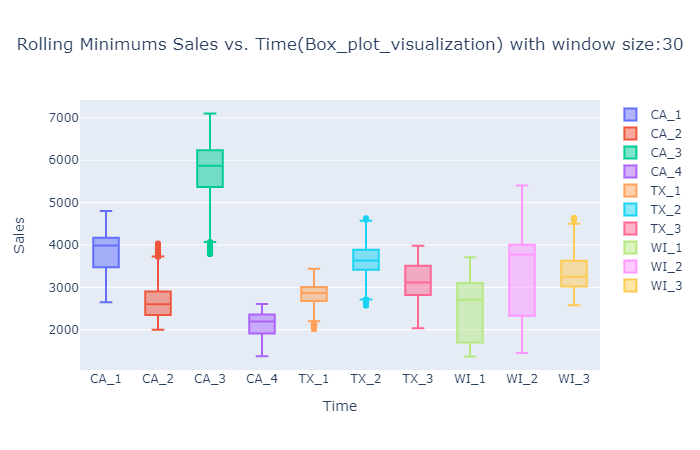

In [26]:
Image(filename='newplot3.png') 

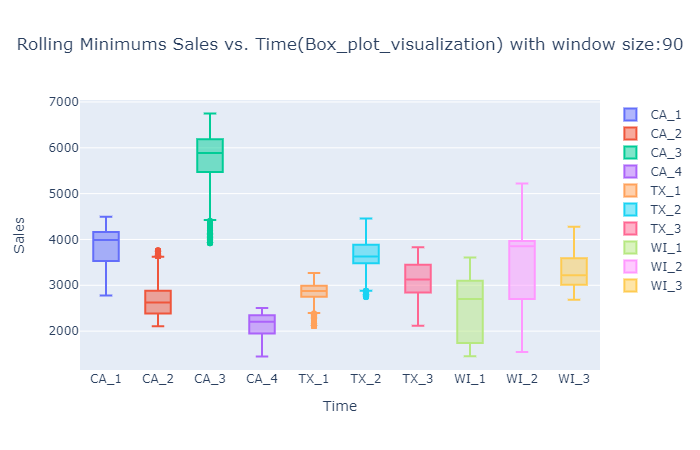

In [27]:
Image(filename='newplot4.png') 

# Observations

Took rolling minimums for different window size ie. 7,10,13,30 and 90.     
The observations are quite similar to rolling averages.

# Rolling Maximums

In [ ]:
name=["Rolling Maximums Sales vs. Time (per store) with window size:7",
      "Rolling Maximums Sales vs. Time (per store) with window size:10",
      "Rolling Maximums Sales vs. Time (per store) with window size:13",
      "Rolling Maximums Sales vs. Time (per store) with window size:30",
      "Rolling Maximums Sales vs. Time (per store) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).max()
  l=np.arange(len(data))
  fig.add_trace(go.Scatter(x=l, y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)

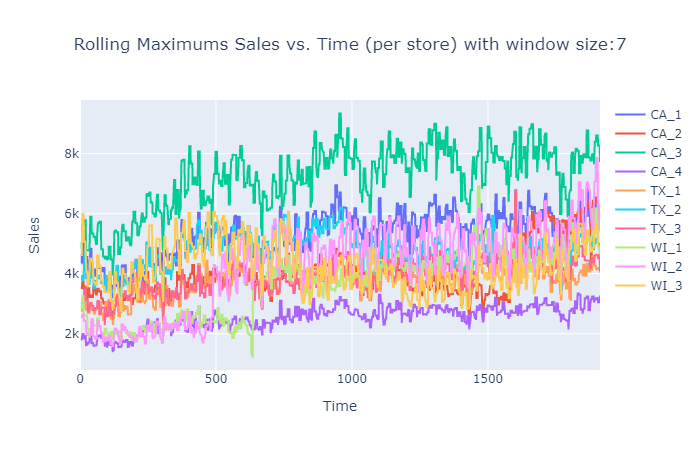

In [34]:
Image(filename='newplot.png') 

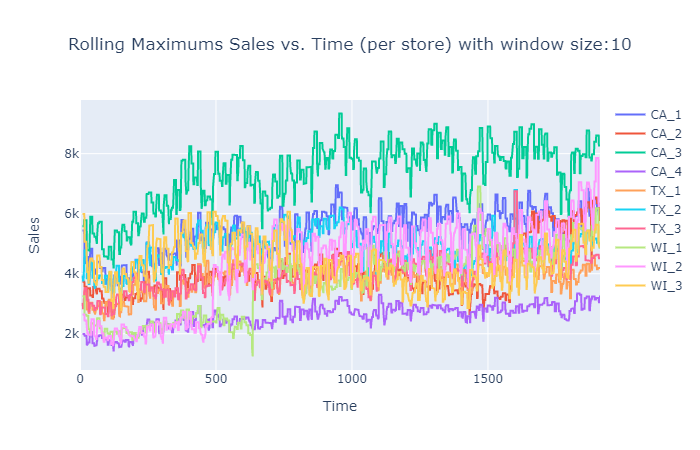

In [35]:
Image(filename='newplot1.png') 

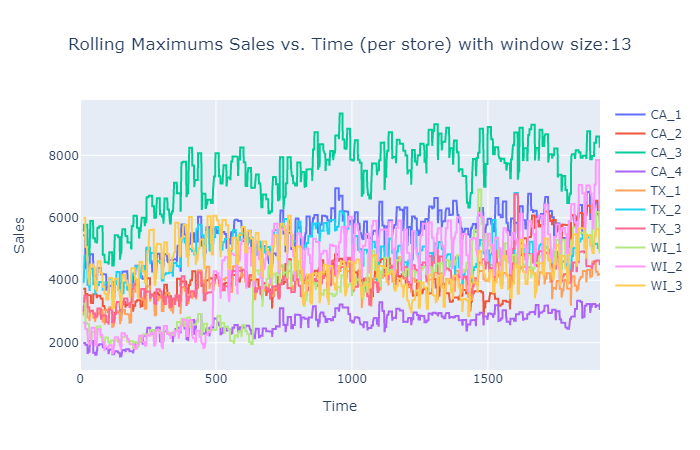

In [36]:
Image(filename='newplot2.png') 

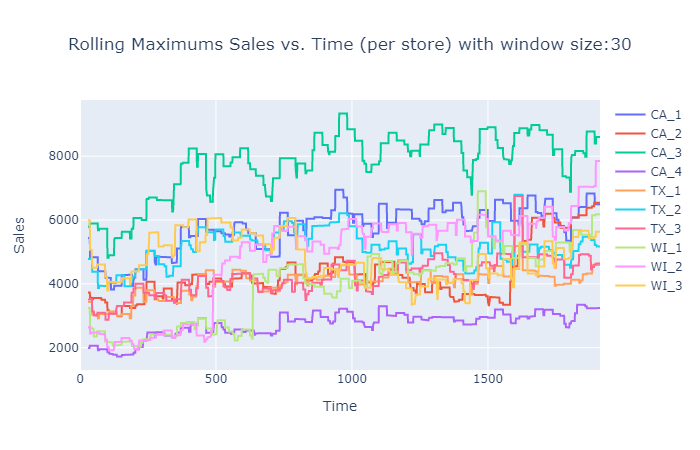

In [37]:
Image(filename='newplot3.png') 

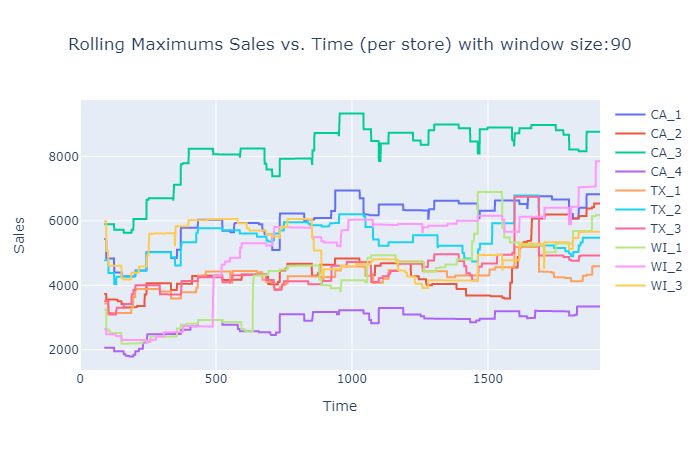

In [38]:
Image(filename='newplot4.png') 

In [ ]:
name=["Rolling Maximums Sales vs. Time(Box_plot_visualization) with window size:7",
      "Rolling Maximums Sales vs. Time(Box_plot_visualization) with window size:10",
      "Rolling Maximums Sales vs. Time(Box_plot_visualization) with window size:13",
      "Rolling Maximums Sales vs. Time(Box_plot_visualization) with window size:30",
      "Rolling Maximums Sales vs. Time(Box_plot_visualization) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).max()
  fig.add_trace(go.Box(x=[store]*len(data), y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)
 fig.show()

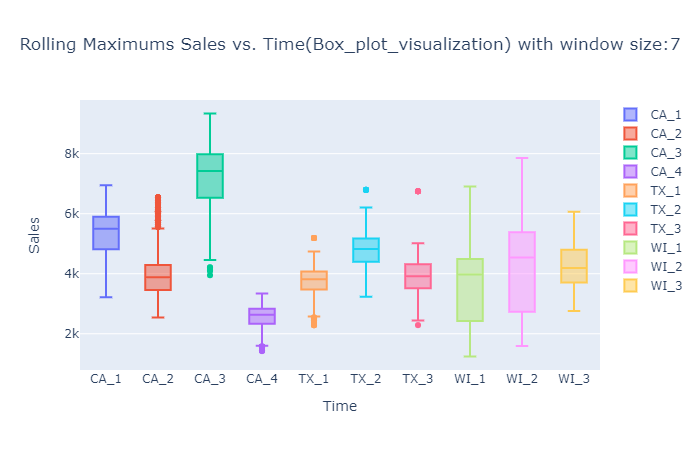

In [39]:
Image(filename='newplot5.png') 

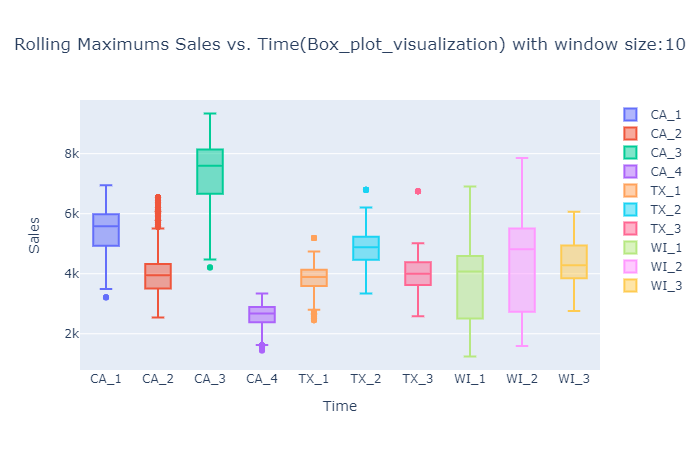

In [40]:
Image(filename='newplot6.png') 

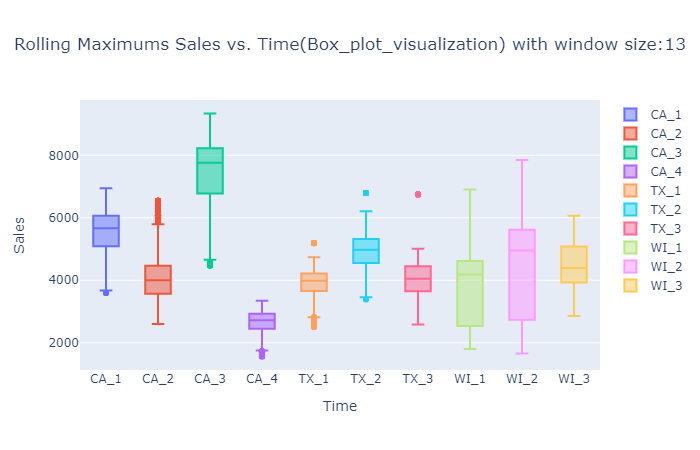

In [41]:
Image(filename='newplot7.png') 

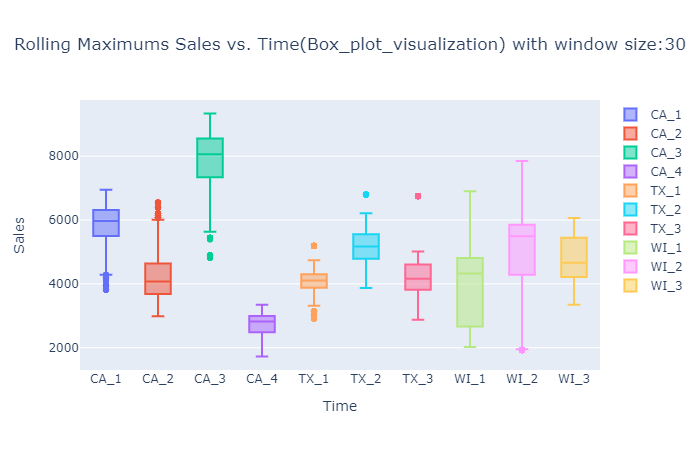

In [42]:
Image(filename='newplot8.png') 

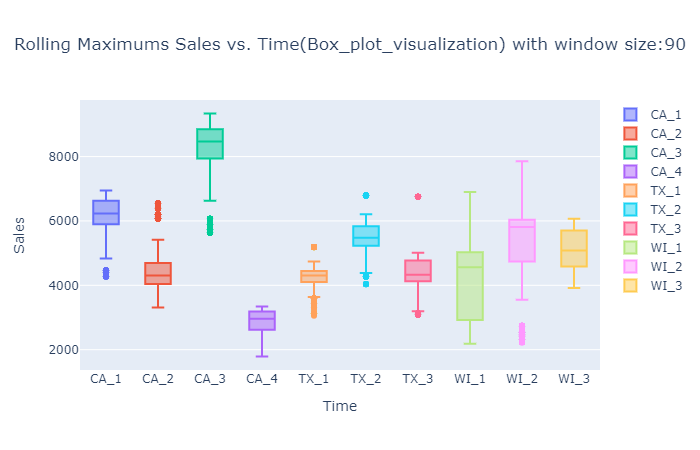

In [43]:
Image(filename='newplot9.png') 

# Observations

Took rolling maximums for different window size ie. 7,10,13,30 and 90.     
The observations are quite similar to rolling averages.

# Rolling 25th Percentiles

In [ ]:
name=["Rolling 25th Percentiles Sales vs. Time (per store) with window size:7",
      "Rolling 25th Percentiles Sales vs. Time (per store) with window size:10",
      "Rolling 25th Percentiles Sales vs. Time (per store) with window size:13",
      "Rolling 25th Percentiles Sales vs. Time (per store) with window size:30",
      "Rolling 25th Percentiles Sales vs. Time (per store) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).apply(lambda x: np.percentile(x,25))
  l=np.arange(len(data))
  fig.add_trace(go.Scatter(x=l, y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)
 fig.show()

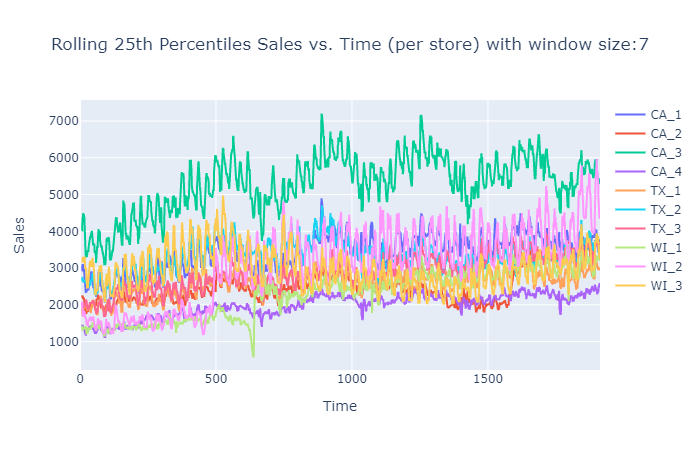

In [44]:
Image(filename='newplot.png') 

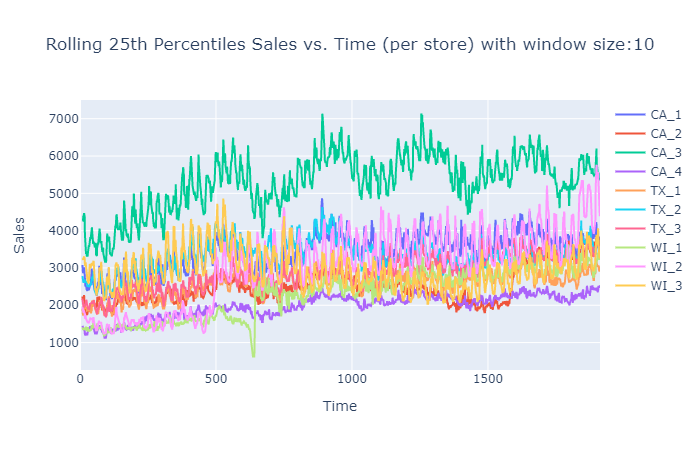

In [45]:
Image(filename='newplot1.png') 

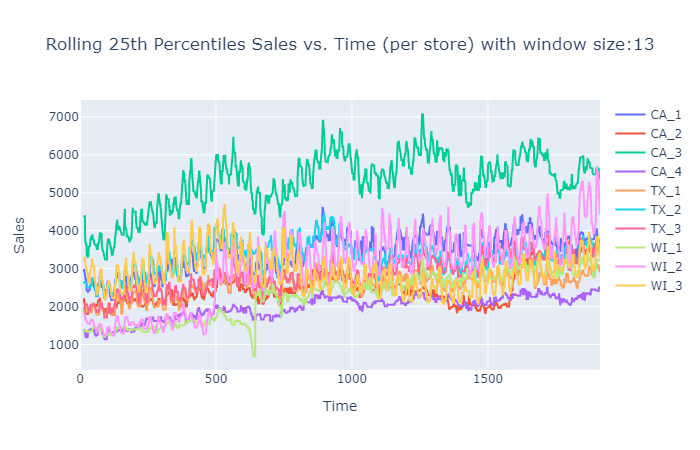

In [46]:
Image(filename='newplot2.png') 

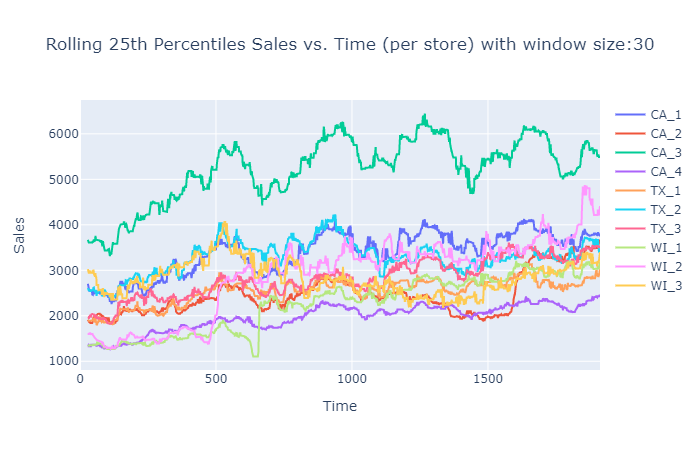

In [47]:
Image(filename='newplot3.png') 

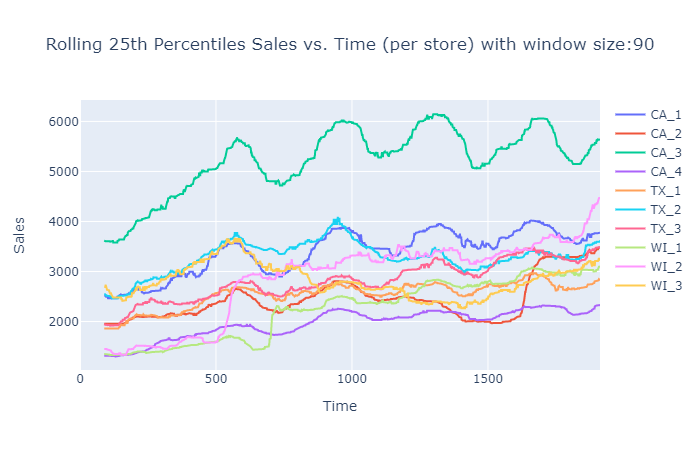

In [48]:
Image(filename='newplot4.png') 

In [ ]:
name=["Rolling 25th Percentiles Sales vs. Time(Box_plot_visualization) with window size:7",
      "Rolling 25th Percentiles Sales vs. Time(Box_plot_visualization) with window size:10",
      "Rolling 25th Percentiles Sales vs. Time(Box_plot_visualization) with window size:13",
      "Rolling 25th Percentiles Sales vs. Time(Box_plot_visualization) with window size:30",
      "Rolling 25th PercentilesSales vs. Time(Box_plot_visualization) with window size:90"]

window_size=[7,10,13,30,90]

for i,j in enumerate(window_size):

 fig = go.Figure()

 for store in stores:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(j).apply(lambda x: np.percentile(x,25))
  fig.add_trace(go.Box(x=[store]*len(data), y=data, name=store))
  
 fig.update_layout(xaxis_title="Time", yaxis_title="Sales",title=name[i],title_x=0.5)
 fig.show()

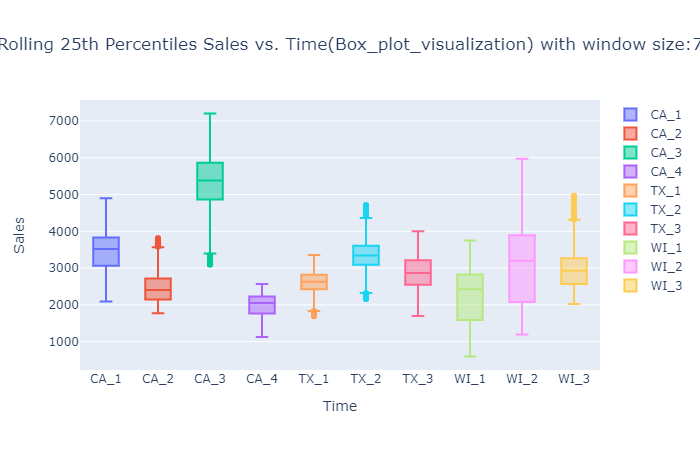

In [49]:
Image(filename='newplot5.png') 

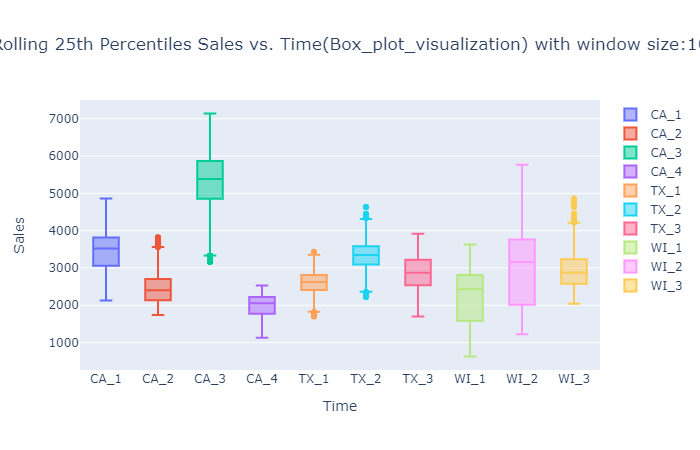

In [50]:
Image(filename='newplot6.png') 

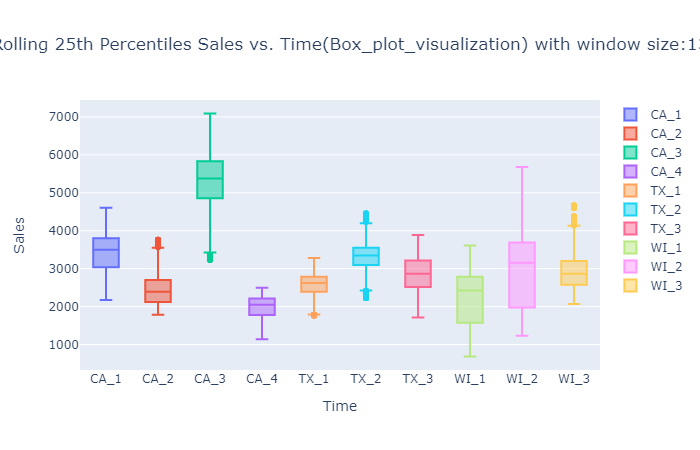

In [51]:
Image(filename='newplot7.png') 

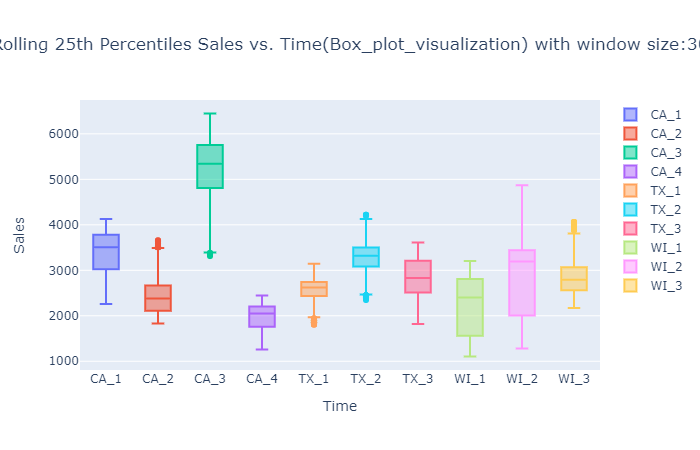

In [52]:
Image(filename='newplot8.png') 

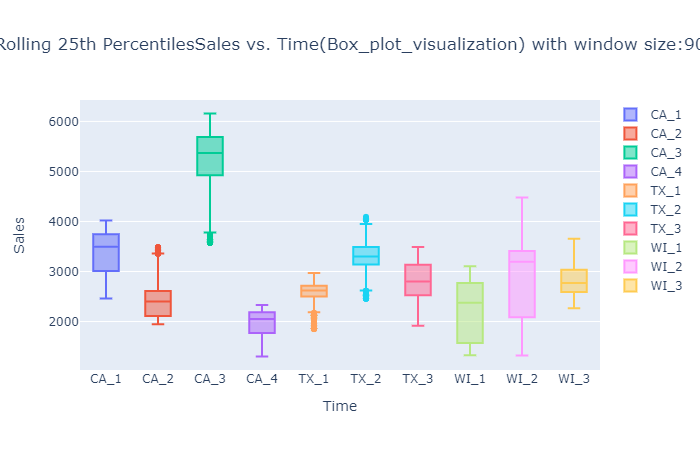

In [53]:
Image(filename='newplot9.png') 

# Observations

Took rolling 25th percentiles for different window size ie. 7,10,13,30 and 90.     
The observations are quite similar to rolling averages.

**sales on state(California)**

In [ ]:
fig = go.Figure()

for store in stores:
 if 'CA' in store:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  l=np.arange(len(data))
  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(90).mean()
  fig.add_trace(go.Scatter(x=l, y=data, name=store))
       
fig.update_layout(xaxis_title="Time", yaxis_title="Sales", title="Rolling Average Sales vs. Time (California)")

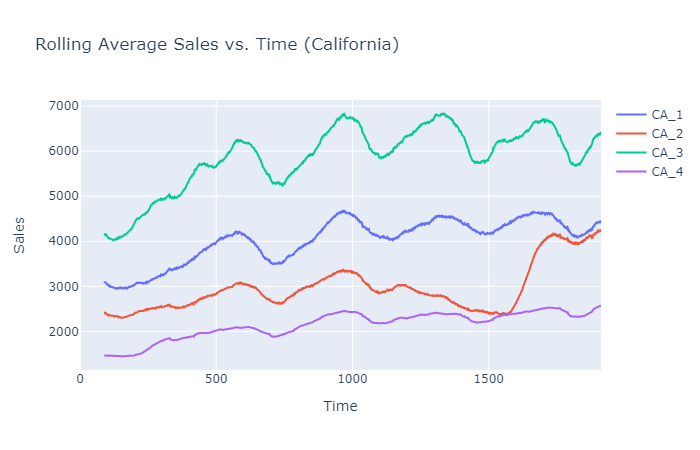

In [6]:
Image(filename='newplot3.png') 

In [ ]:
fig = go.Figure()

for store in stores:
 if 'CA' in store:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  l=np.arange(len(data))
  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(90).mean()
  fig.add_trace(go.Box(x=[store]*len(data), y=data, name=store))
    
fig.update_layout(xaxis_title="Time", yaxis_title="Sales", title="Rolling Average Sales vs. Store name(Box_plot_visualization)")

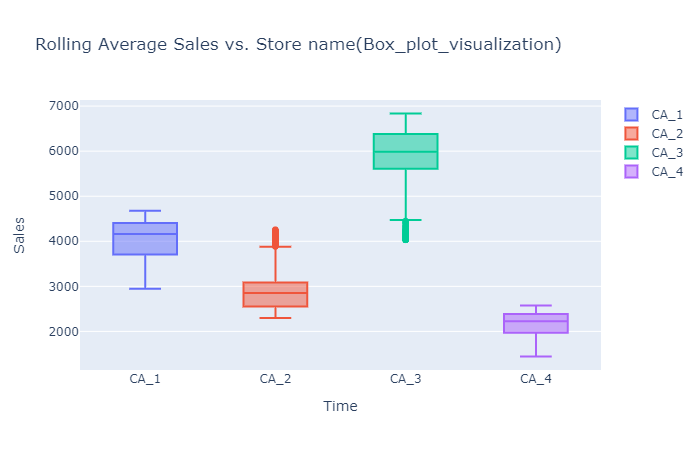

In [7]:
Image(filename='newplot4.png') 

**Observations**

1. The average sales in descending order are CA_3, CA_1, CA_2, CA_4.
2. CA stores has large disparity in sales and sales curves never meet. This may show that there are "Hubs" of development which don't change after some time.

In [ ]:
data = np.transpose([Means[:4], stores[:4]])
df = pd.DataFrame(data, columns=["Mean sales", "Stores"])
px.bar(df, x="Stores", y="Mean sales", color="Stores", title="Stores vs Mean sales")

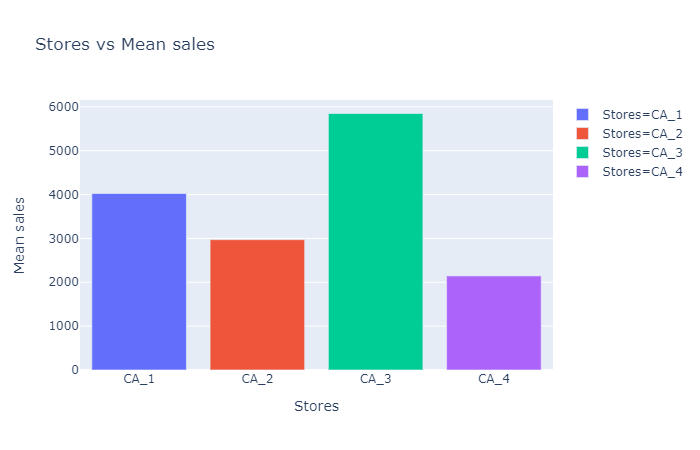

In [8]:
Image(filename='newplot5.png') 

**Observations**

1. Store CA_3 has maximum sales.
2. Store CA_4 has minimum sales.


**sales on state(Wisconsin)**

In [ ]:
fig = go.Figure()

for store in stores:
 if 'WI' in store:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  l=np.arange(len(data))
  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(90).mean()
  fig.add_trace(go.Scatter(x=l, y=data, name=store))
       
fig.update_layout(xaxis_title="Time", yaxis_title="Sales", title="Rolling Average Sales vs. Time (Wisconsin)")

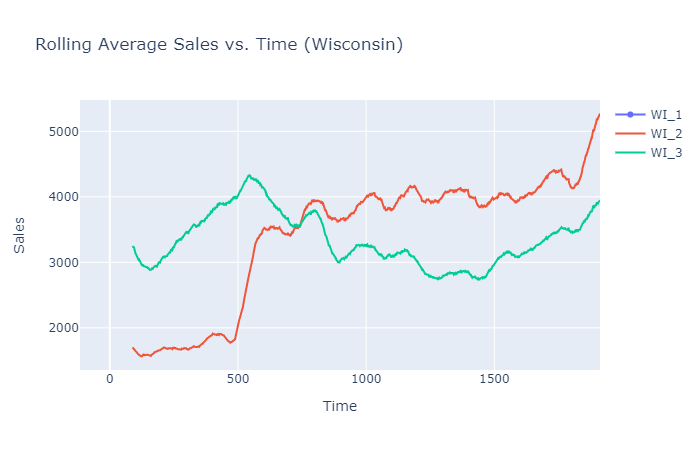

In [9]:
Image(filename='newplot.png') 

**sales on state(Texas)**

In [ ]:
fig = go.Figure()

for store in stores:
 if 'WI' in store:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  l=np.arange(len(data))
  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(90).mean()
  fig.add_trace(go.Box(x=[store]*len(data), y=data, name=store))
    
fig.update_layout(xaxis_title="Time", yaxis_title="Sales", title="Rolling Average Sales vs. Store name(Box_plot_visualization)")

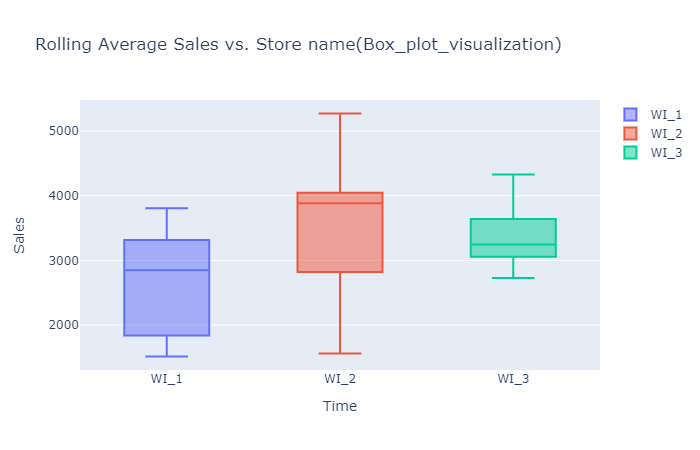

In [10]:
Image(filename='newplot1.png') 

**Observations**

1. The average sales in descending order are WI_2, WI_3, WI_1.
2. WI stores has low disparity in sales and sales curves meet which may show that WI does not have specific 'hubs' of development and there is equity in development across the state.


In [ ]:
data = np.transpose([Means[7:10], stores[7:10]])
df = pd.DataFrame(data, columns=["Mean sales", "Stores"])
px.bar(df, x="Stores", y="Mean sales", color="Stores", title="Stores vs Mean sales")

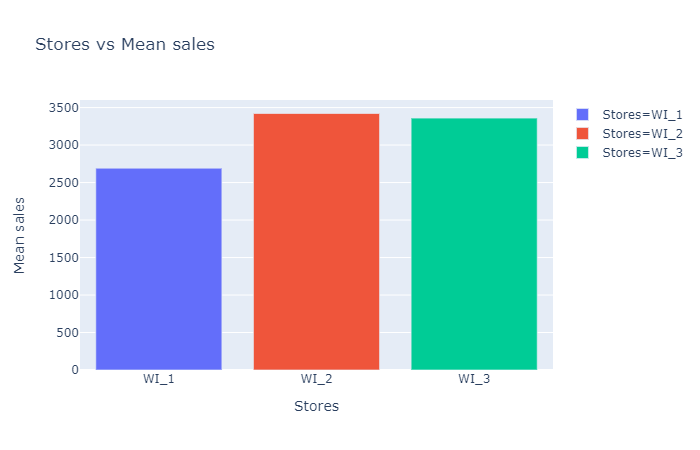

In [11]:
Image(filename='newplot2.png') 

**Oservations**

1. Store W1_2 has maximum sales 
2. Store W1_1 has minimum sales.

In [ ]:
fig = go.Figure()

for store in stores:
 if 'TX' in store:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  l=np.arange(len(data))
  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(90).mean()
  fig.add_trace(go.Scatter(x=l, y=data, name=store))
       
fig.update_layout(xaxis_title="Time", yaxis_title="Sales", title="Rolling Average Sales vs Time(Texas)")

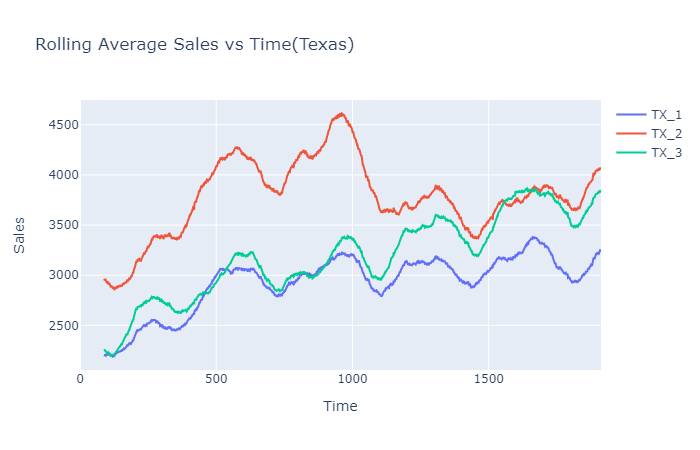

In [12]:
Image(filename='newplot3.png') 

In [ ]:
fig = go.Figure()

for store in stores:
 if 'TX' in store:
  store_items=[]
  for a in sales_p.columns:
    if store in a:
      store_items.append(a)

  l=np.arange(len(data))
  data = sales_p[store_items].sum(axis=1)
  data = data.rolling(90).mean()
  fig.add_trace(go.Box(x=[store]*len(data), y=data, name=store))
    
fig.update_layout(xaxis_title="Time", yaxis_title="Sales", title="Rolling Average Sales vs. Store name(Box_plot_visualization)")

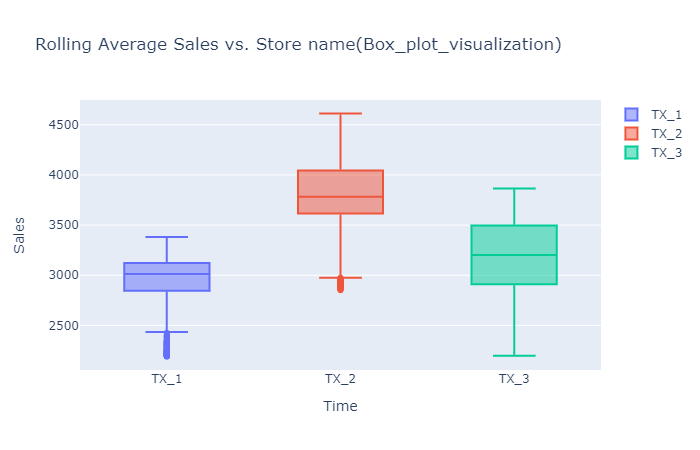

In [13]:
Image(filename='newplot4.png') 

**Observations**

1. The average sales in descending order are TX_2, TX_3, TX_1. 
2. TX stores has very low disparity in sales and even though the sales curves meet but not like in WI.
3. The variance in TX stores is higher as comapare to WI which show that there might be 'hubs' of development, but not as in CA stores.


In [ ]:
data = np.transpose([Means[4:7], stores[4:7]])
df = pd.DataFrame(data, columns=["Mean sales", "Stores"])
px.bar(df, x="Stores", y="Mean sales", color="Stores", title="Stores vs Mean sales")

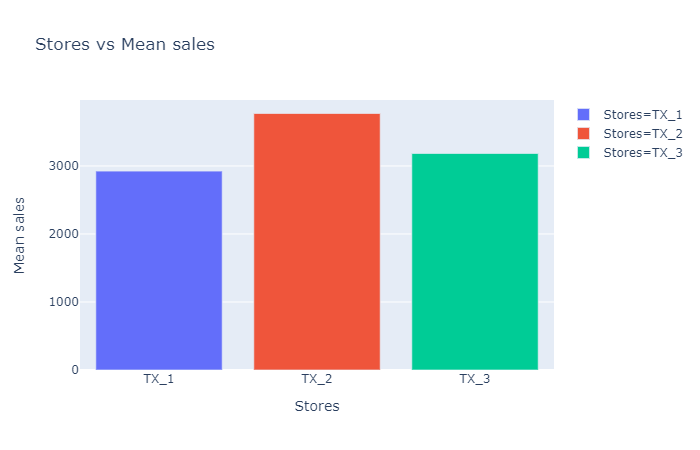

In [14]:
Image(filename='newplot5.png') 

**Observations**

1. Store TX_2 has maximum sales
2. Store TX_1 has minimum sales.


**items by category**

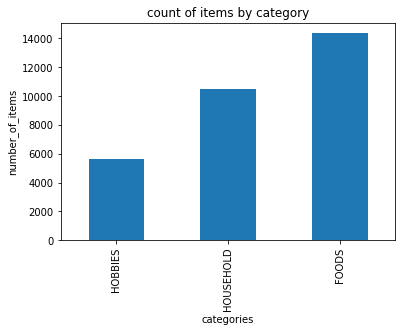

In [ ]:
s_g_id=(sales.groupby('cat_id').count()['id'])
s_g_id=s_g_id.sort_values()
s_g_id.plot(kind='bar', title='count of items by category')
plt.xlabel("categories")
plt.ylabel("number_of_items")
plt.show()

**Observations**

1. FOODS category has the highest number of items.
2. The number of items in descending order are FOODs, HOUSEHOLD and HOBBIES.


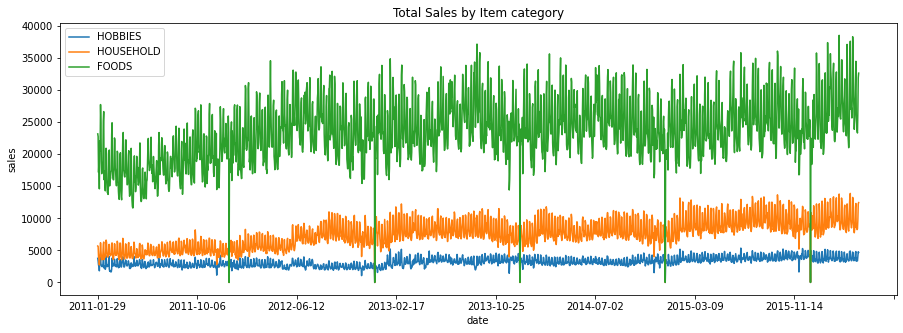

In [ ]:
categories=sales['cat_id'].unique()

for cat in categories:
  cat_cols=[]
  for c in sales_p.columns:
    if cat in c:
      cat_cols.append(c)
  sales_p[cat_cols].sum(axis=1).plot(figsize=(15, 5), title='Total Sales by Item category')

plt.legend(sales['cat_id'].unique())
plt.ylabel("sales")
plt.show()

**Observations**

1. FOODS category items have maximum number of sales.
2. For some days sale is nearly zero ie. longer spikes in sales curves, which may show that there is a holiday or item is unavailable on that day.

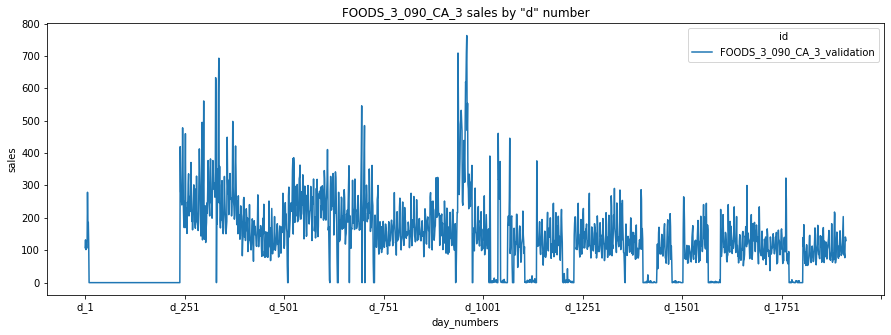

In [ ]:
# take a random item that sell a lot and check it's sales curve

Note there are days where it appears the item is unavailable and sales flatline

d_cols = [c for c in sales.columns if 'd_' in c]
sales_f=sales.loc[sales['id'] == 'FOODS_3_090_CA_3_validation']
sales_f=sales_f.set_index('id')[d_cols].T
sales_f.plot(figsize=(15, 5),
             title='FOODS_3_090_CA_3 sales by "d" number')
plt.xlabel("day_numbers")
plt.ylabel("sales")
plt.show()

**Observations**

1. Sales curve is very erratic which implies that there are so many factors affect the sales on a given day.
2. For some days sales curve is flatline which means item is unavailable.
3. Item is unavailable for many periods of time.


**sells_price data**

In [ ]:
#melt the data
dataframe = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold')
dataframe=dataframe.dropna()

#combine the data
final_df = pd.merge(dataframe, cal, on='d', how='left')
final_df = pd.merge(final_df, prices, on=['store_id','item_id','wm_yr_wk'], how='left')

In [ ]:
g_price = final_df.groupby(['state_id','store_id','item_id'],as_index=False)
g_price = g_price['sell_price'].mean().dropna()
fig = px.violin(g_price, x='store_id', y='sell_price', color='state_id',box=True, hover_name='item_id', title='Items prices vs Stores')
fig.show()

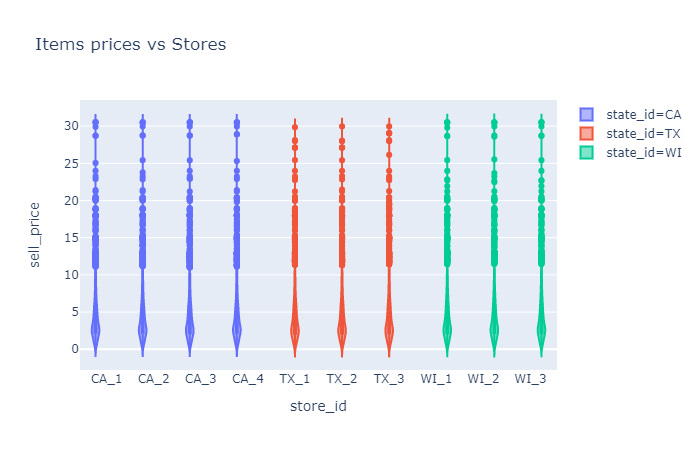

In [15]:
Image(filename='newplot6.png') 

**Observations**

1. Item prices distribuition is almost uniform in all stores(CA, WI and TX).
2. Item HOBBIES_1_060 is most expensive item being sold at walmarts priced at around 30.53 dollars.
3. In CA_2, CA_3 and CA_4 the most expensive item being sold is HOBBIES_1_361 and for CA_1 the Item HOBBIES_1_060 is most expensive item being sold.
4. Item HOUSEHOLD_1_060 is most expensive item being sold at TX priced at around 29.87 dollars.
5. Item HOBBIES_1_225 priced at around 30.51 dollars is the most expensive item being sold at TX_1 and TX_2, while item Item HOBBIES_1_361 priced at around 30.51 is the most expensive item at TX_3.

In [ ]:
g_price_cat = final_df.groupby(['store_id','cat_id','item_id'],as_index=False)
g_price_cat= g_price_cat.mean().dropna()
fig = px.violin(g_price_cat, x='store_id', color='cat_id', y='sell_price',box=True, hover_name='item_id', title='Items prices vs Categories')

fig.show()


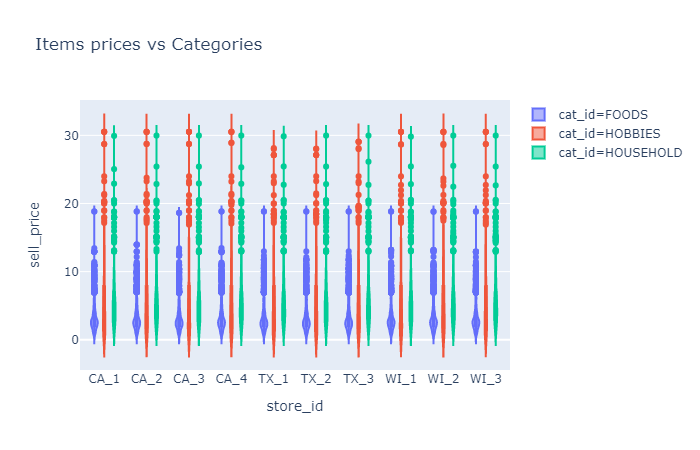

In [16]:
Image(filename='newplot7.png') 

**Observations**

1. Food category items are the cheapest items among Food, Hobbies and Household items.
2. Household and Hobbies items have nearly same price range.

**calendar data**

In [21]:
cal.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [22]:
a=set(cal["event_name_1"].unique())
b=set(cal["event_name_2"].unique())
total_unique_events = len(a.union(b))-1
print("Total unique events are",total_unique_events)

Total unique events are 30


In [23]:
a=set(cal["event_type_1"].unique())
b=set(cal["event_type_2"].unique())
total_unique_events_names = len(a.union(b))-1
print("Total unique events names are",total_unique_events_names)

Total unique events names are 4


In [24]:
a=len(cal.loc[cal['event_name_1'].notnull()])
b=len(cal.loc[cal['event_name_2'].notnull()])
print("total not null values in event_name_1 are",a)
print("total not null values in event_name_2 are",b)

total not null values in event_name_1 are 162
total not null values in event_name_2 are 5


**Observations**

1. SNAP follows a diiferent pattern in different state.
2. SNAP is allowed on the first ten days in CA, it follows the pattern 101-011 in TX and follows the pattern 011 in WI.
3. There are total 30 unique events which belong to 5 unique types.
4. There are total 162 not null values in event_name_1 and 5 not null values in event_name_2 for approx 4.5 years, which results these events occur every year.

In [1]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('EDA.ipynb')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
